In [1]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import pandas as pd
from fa2 import ForceAtlas2


In [2]:
df_edges = pd.read_csv("csv_outputs/graph_channels_large.csv", sep=';')
#df_edges = df_edges.drop(.index)
df_edges.loc[df_edges[df_edges.weight < 16].index, 'weight'] = 16
display(df_edges.head())


,source,target,weight
0,0,1,12881
1,0,2,8482
2,0,3,20346
3,0,4,14911
4,0,5,16


In [3]:
G = nx.from_pandas_edgelist(df_edges, edge_attr=True)


In [4]:
forceatlas2 = ForceAtlas2(gravity=0.5)
posses = forceatlas2.forceatlas2_networkx_layout(G,iterations=1000)

100%|██████████| 1000/1000 [00:44<00:00, 22.47it/s]

BarnesHut Approximation  took  22.05  seconds
Repulsion forces  took  8.20  seconds
Gravitational forces  took  0.06  seconds
Attraction forces  took  13.39  seconds
AdjustSpeedAndApplyForces step  took  0.33  seconds


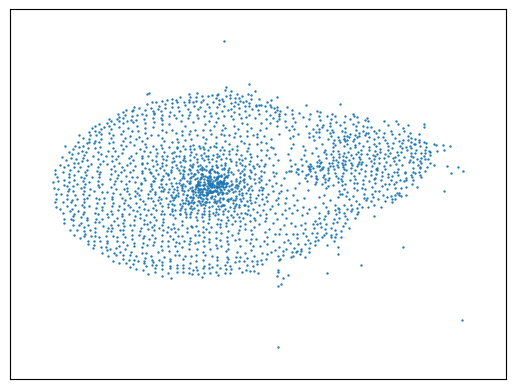

In [5]:
nx.draw_networkx(G, pos=posses, with_labels=False, width=0,node_size=0.5)


In [6]:
louvain_partitions = nx_comm.louvain_communities(G, resolution=0.9, threshold=1e-1,seed=1)
print("We have {nbr}".format(nbr=len(louvain_partitions)))

We have 3


In [7]:
for idx in range(len(louvain_partitions)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_partitions[idx])))

Community number 0 has 438 members
Community number 1 has 490 members
Community number 2 has 1205 members


In [40]:
display(louvain_partitions[1])

{6,
 7,
 8,
 9,
 10,
 11,
 15,
 16,
 21,
 23,
 29,
 31,
 32,
 37,
 53,
 56,
 61,
 62,
 64,
 67,
 71,
 76,
 77,
 78,
 82,
 87,
 88,
 90,
 92,
 93,
 96,
 97,
 101,
 109,
 120,
 121,
 122,
 125,
 126,
 136,
 137,
 140,
 141,
 142,
 143,
 144,
 145,
 147,
 148,
 152,
 153,
 155,
 165,
 166,
 169,
 173,
 176,
 179,
 181,
 184,
 187,
 191,
 192,
 195,
 199,
 200,
 201,
 202,
 203,
 205,
 207,
 208,
 209,
 211,
 212,
 215,
 221,
 229,
 238,
 240,
 246,
 251,
 252,
 253,
 256,
 259,
 261,
 265,
 266,
 267,
 270,
 273,
 275,
 277,
 278,
 279,
 280,
 284,
 286,
 293,
 302,
 307,
 308,
 309,
 310,
 311,
 313,
 315,
 318,
 326,
 328,
 331,
 336,
 339,
 340,
 341,
 342,
 344,
 348,
 349,
 352,
 355,
 360,
 365,
 366,
 367,
 370,
 374,
 376,
 379,
 384,
 386,
 388,
 391,
 394,
 396,
 397,
 402,
 403,
 404,
 405,
 407,
 408,
 409,
 413,
 422,
 423,
 424,
 428,
 429,
 432,
 442,
 443,
 444,
 446,
 448,
 453,
 460,
 462,
 468,
 469,
 471,
 473,
 482,
 484,
 491,
 492,
 494,
 499,
 502,
 508,
 512,
 514

In [12]:
filtered_channels = list(louvain_partitions[1])
#filtered_channels = filtered_channels + (list(louvain_partitions[3]))
filtered_channels = sorted(filtered_channels)
filtered_channels_list = filtered_channels
filtered_channels = pd.DataFrame(filtered_channels)
display(filtered_channels.head())

,0
0,6
1,7
2,8
3,9
4,10


In [13]:
filtered_channels.to_csv("csv_outputs/louvain_filtered_channels_large_fix.csv", sep=';', index=False)

In [14]:
def filter_function(n):
    return n in filtered_channels_list

sub_G = nx.subgraph_view(G, filter_node=filter_function)

In [27]:
louvain_communities = nx_comm.louvain_communities(sub_G, resolution=1.1,threshold=1e-1, seed=2)
print("We have detected {num} communities".format(num=len(louvain_communities)))

We have detected 6 communities


In [28]:
for idx in range(len(louvain_communities)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_communities[idx])))

Community number 0 has 102 members
Community number 1 has 90 members
Community number 2 has 62 members
Community number 3 has 62 members
Community number 4 has 172 members
Community number 5 has 2 members


- 0 CNN, Truly, Inside, lean left
- 1 Vox, BBC lean left
- 2 far right
- 3 TYT, MSNBC far left
- 4 Mark Dice, White House, Jason A. right wing
- 5 Fox News, Fox Business

In [41]:
display(louvain_communities[5])

{31, 187}

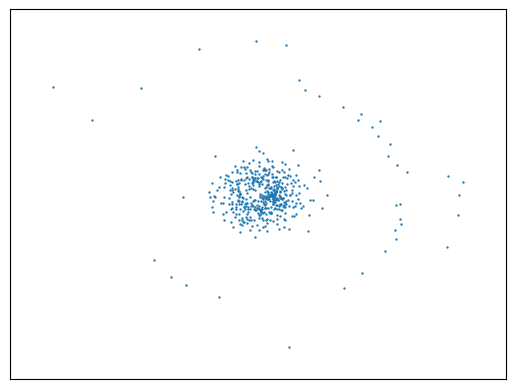

In [34]:
nx.draw_networkx(sub_G, pos=posses, with_labels=False, width=0,node_size=0.5)


In [42]:
a0 =list(louvain_communities[0])
a1 =list(louvain_communities[1])
a2 =list(louvain_communities[2])
a3 =list(louvain_communities[3])
a4 =list(louvain_communities[4])
a5 =list(louvain_communities[5])

b0 = np.full_like(a0,0)
b1 = np.full_like(a1,1)
b2 = np.full_like(a2,2)
b3 = np.full_like(a3,3)
b4 = np.full_like(a4,4)
b5 = np.full_like(a5,5)
